# Статистический анализ данных по тарифным планам

Федеральный оператор сотовой связи «Мегалайн» предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Задача**: сделать предварительный анализ тарифов на небольшой выборке клиентов, проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Описание данных

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. 

**Описание тарифов**

*Тариф «Смарт»*

Ежемесячная плата: 550 рублей;

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;

Стоимость услуг сверх тарифного пакета:
- Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
- Сообщение — 3 рубля.
- 1 Гб интернет-трафика — 200 рублей.

*Тариф «Ультра»*

Ежемесячная плата: 1950 рублей;

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;

Стоимость услуг сверх тарифного пакета:
- Минута разговора — 1 рубль;
- Сообщение — 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

**Ссылки на скачивание датасетов:**

[/datasets/calls.csv](https://code.s3.yandex.net/datasets/calls.csv)

[/datasets/internet.csv](https://code.s3.yandex.net/datasets/internet.csv)

[/datasets/messages.csv](https://code.s3.yandex.net/datasets/messages.csv)

[/datasets/tariffs.csv](https://code.s3.yandex.net/datasets/tariffs.csv)

[/datasets/users.csv](https://code.s3.yandex.net/datasets/users.csv)

# План работы:

1. Знакомство с данными;
2. Предобработка и подготовка данных;
3. Агрегированные расчёты с группировкой данных;
4. Анализ данных и подсчёт выручки;
5. Проверка гипотез;
6. Подведение итогов.

# Импорт библиотек

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st

**Игнорируем предупреждения**

In [2]:
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

# Знакомство с данными

In [3]:
# Функция открывает csv-файл и сохраняет его в отдельную переменную

def csv_to_df(pth1, pth2, pth3):
    
    if os.path.exists(pth1):
        df = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        df = pd.read_csv(pth2)
    else:
        df = pd.read_csv(pth3)
        
    return df

In [4]:
# Проложим пути к датасетам

calls_1 = r'C:\Users\lenat\Downloads\calls.csv'
calls_2 = 'calls.csv'
calls_3 = 'https://code.s3.yandex.net/datasets/calls.csv'

internet_1 = r'C:\Users\lenat\Downloads\internet.csv'
internet_2 = 'internet.csv'
internet_3 = 'https://code.s3.yandex.net/datasets/internet.csv'

messages_1 = r'C:\Users\lenat\Downloads\messages.csv'
messages_2 = 'messages.csv'
messages_3 = 'https://code.s3.yandex.net/datasets/messages.csv'

tariffs_1 = r'C:\Users\lenat\Downloads\tariffs.csv'
tariffs_2 = 'tariffs.csv'
tariffs_3 = 'https://code.s3.yandex.net/datasets/tariffs.csv'

users_1 = r'C:\Users\lenat\Downloads\users.csv'
users_2 = 'users.csv'
users_3 = 'https://code.s3.yandex.net/datasets/users.csv'

In [5]:
calls = csv_to_df(calls_1, calls_2, calls_3)
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
sessions = csv_to_df(internet_1, internet_2, internet_3)
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
messages = csv_to_df(messages_1, messages_2, messages_3)
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
tariffs = csv_to_df(tariffs_1, tariffs_2, tariffs_3)
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
users = csv_to_df(users_1, users_2, users_3)
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [10]:
# Функция выводит основную информацию о датафрейме

def hello_data(data):
    
    display(data.head(5))
    
    print(data.info())
    
    print(data.describe())
    
    print('Дубликатов в таблице:', data.duplicated().sum())
    
    print('Форма таблицы:{}'.format(data.shape))
    
    return (data.isna().mean()*100).sort_values(ascending=False).to_frame().rename(
    columns = {0:'Процент_пропусков'}).style.background_gradient('coolwarm').format("{:.1f}")

# Строим гистограмму и ящик с усами для столбца

def hist_df(col, col_name):
    
    plt.hist(col)
    plt.title(col_name)
    plt.xlabel('Значение')
    plt.ylabel('Количество')
    
    return plt.show()

def boxplot_df(col, col_name):
    
    plt.boxplot(col)
    plt.title(col_name)
    plt.xlabel('Значение')
    plt.ylabel('Количество')
    
    return plt.show()

In [11]:
hello_data(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
Дубликатов в таблице: 0
Форма таблицы:(202607, 4)


,Процент_пропусков
id,0.0
call_date,0.0
duration,0.0
user_id,0.0


Не соответствующие типы данных в столбцах: 
call_date - object, 
user_id - int.

В среднем длительность звонка = 6-7 минут.

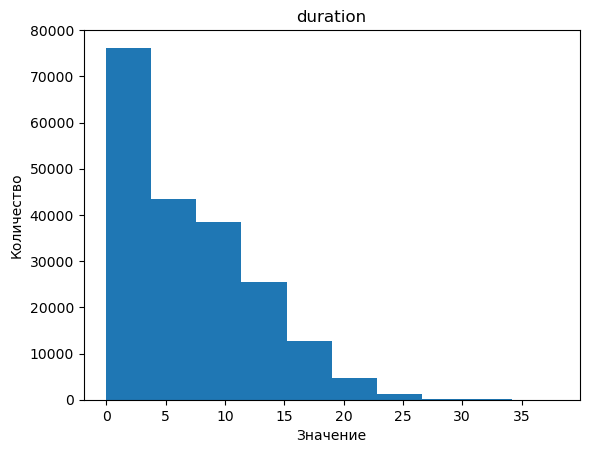

In [12]:
hist_df(calls['duration'], 'duration')

Скошенность набора данных положительная

In [13]:
calls['duration'].isin([0]).sum()

39613

39613 звонков с нулевой продолжительностью: нулями могут быть обозначены пропущенные звонки, поэтому их не будем удалять.

In [14]:
hello_data(sessions)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000
Дубликатов в таблице: 0
Форма таблицы:(149396, 5)


,Процент_пропусков
Unnamed: 0,0.0
id,0.0
mb_used,0.0
session_date,0.0
user_id,0.0


Не соответствующий тип данных в столбце session_date - object

Пользователи в основном расходуют 350-370 mb.

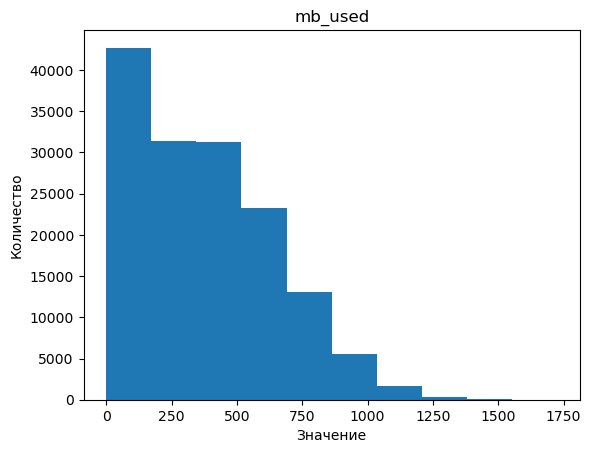

In [15]:
hist_df(sessions['mb_used'], 'mb_used')

Скошенность набора данных положительная, проверим данные на выбросы

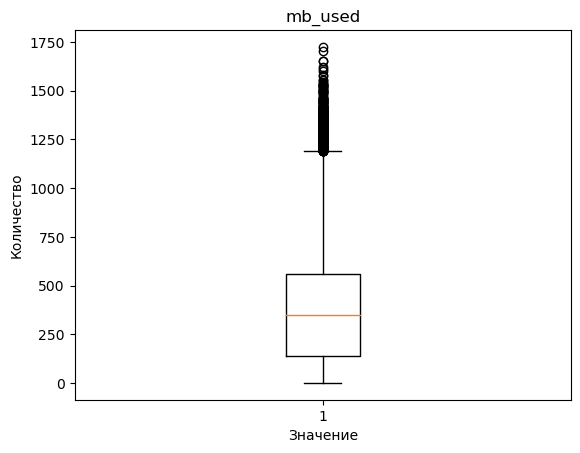

In [16]:
boxplot_df(sessions['mb_used'], 'mb_used')

Возможно, некоторые пользователи используют мобильный интернет для потоковой передачи видео, онлайн-игр или загрузки больших файлов, от того есть некоторое кол-во высокого потребления mb.

In [17]:
hello_data(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
Дубликатов в таблице: 0
Форма таблицы:(123036, 3)


,Процент_пропусков
id,0.0
message_date,0.0
user_id,0.0


Не соответствующий тип данных в столбце message_date - object

In [18]:
hello_data(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
Дубликатов в таблице: 0
Форма таблицы:(500, 8)


,Процент_пропусков
churn_date,92.4
user_id,0.0
age,0.0
city,0.0
first_name,0.0
last_name,0.0
reg_date,0.0
tariff,0.0


Большинство значений в столбце churn_date - пропуски - это нерасторженные договоры. Не соответствующий тип данных в столбцах churn_date и reg_date - object

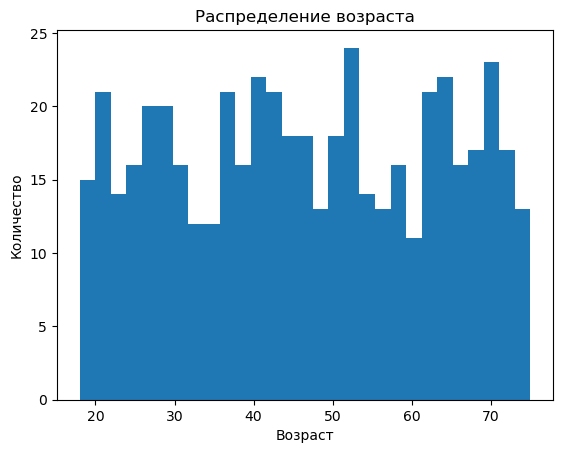

In [19]:
plt.hist(users['age'], bins=29)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

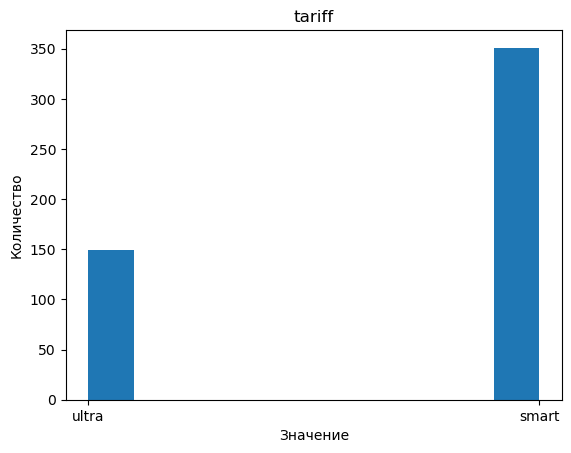

In [20]:
hist_df(users['tariff'], 'tariff')

In [21]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [22]:
print(f'Тарифом "smart" пользуются в более чем {round(351/149, 2)} раза бользователей, чем тарифом "ultra"')

Тарифом "smart" пользуются в более чем 2.36 раза бользователей, чем тарифом "ultra"


**Замечания по первичному взгляду на данные:**
1. В каждой из таблиц есть столбцы с несоответствующими типами данных;
2. Дубликатов не обнаружено;
3. В столбце churn_date талблицы users более 90% пропусков;
4. Пользователи в основном расходуют 348-370 mb;
5. Пользователей тарифом 'smart' в 2 2.36 больше чем пользователей с тарифом 'ultra';
6. Неинформативный столбец Unnamed: 0 в датафрейме sessions.

# Предобработка данных
## Изменение типа данных

Переведём столбцы

- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

к новому типу данных datetime

In [23]:
# обработка столбца reg_date

users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d'
)

# обработка столбца churn_date

users['churn_date'] = pd.to_datetime(
    users['churn_date'], format='%Y-%m-%d'
)

# обработка столбца call_date

calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d'
)

# обработка столбца message_date

messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d'
)

# обработка столбца session_date

sessions['session_date'] = pd.to_datetime(
    sessions['session_date'], format='%Y-%m-%d'
)

В столбце `duration` датафрейма `calls` значения дробные. Округлим их вверх и приведём столбец к типу `int`.

In [24]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

## Удаление неинформативных столбцов и добавление новых

Удалим столбец Unnamed: 0 из датафрейма sessions

In [25]:
sessions.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [26]:
sessions.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Добавим столбцы `month` в датафреймы:

- `calls` с номером месяца из столбца `call_date`
- `messages` с номером месяца из столбца `message_date`
- `sessions` с номером месяца из столбца `session_date`.

In [27]:
# обработка столбца calls

calls['month'] = calls['call_date'].dt.month

# обработка столбца messages

messages['month'] = messages['message_date'].dt.month

# обработка столбца sessions

sessions['month'] = sessions['session_date'].dt.month

# Агрегированные расчёты с группировкой данных

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам.

In [28]:
calls_per_month = calls.groupby(by=['user_id', 'month']).agg(calls=('duration', 'count'))

calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Количество израсходованных минут разговора для каждого пользователя по месяцам:

In [29]:
minutes_per_month = calls.groupby(by=['user_id', 'month']).agg(minutes=('duration', 'sum'))

minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Количество отправленных сообщений по месяцам для каждого пользователя:

In [30]:
messages_per_month = messages.groupby(by=['user_id', 'month']).agg(messages=('message_date', 'count'))

messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Количество потраченных мегабайт по месяцам для каждого пользователя:

In [31]:
sessions_per_month = sessions.groupby(by=['user_id', 'month']).agg({'mb_used': 'sum'})

sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

# Анализ данных и подсчёт выручки

In [32]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета

Объединим все посчитанные выше значения в один датафрейм `user_behavior`.
Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [33]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [34]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных:

In [35]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Присоединяем информацию о тарифах

In [36]:
# переименование столбца tariff_name на tariff

tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [37]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [38]:
user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Посчитаем количество минут разговора, сообщений и мегабайт, превышающих включенные в тариф

In [39]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [40]:
user_behavior[['paid_minutes', 'paid_messages', 'paid_mb']].tail()

,paid_minutes,paid_messages,paid_mb
3209,0.0,0.0,5219.36
3210,0.0,0.0,0.00
3211,0.0,0.0,2428.51
3212,112.0,9.0,2603.31
3213,0.0,16.0,0.00


Переведём превышающие тариф мегабайты в гигабайты и сохраняем в столбец `paid_gb`

In [41]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Посчитаем выручку за минуты разговора, сообщения и интернет

In [42]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

In [43]:
user_behavior[['cost_minutes', 'cost_messages', 'cost_gb']].tail()

,cost_minutes,cost_messages,cost_gb
3209,0.0,0.0,1200
3210,0.0,0.0,0
3211,0.0,0.0,600
3212,336.0,27.0,600
3213,0.0,48.0,0


Почитаем помесячную выручку с каждого пользователя, она будет храниться в столбце `total_cost`

In [44]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Пусть датафрейм `stats_df` для каждой пары "месяц-тариф" будет хранить основные характеристики

In [45]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

In [46]:
stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Распределение среднего количества звонков по видам тарифов и месяцам

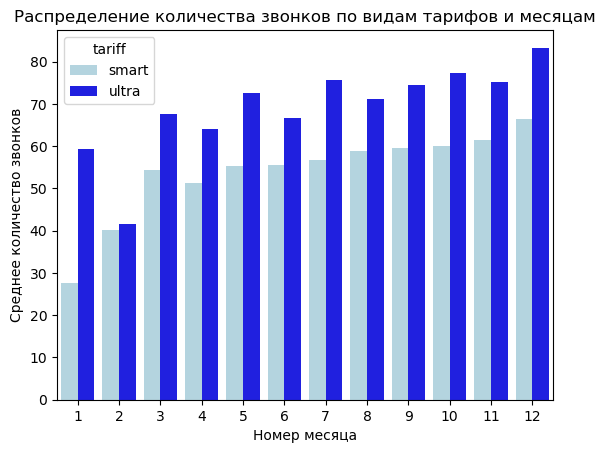

In [47]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

В среднем пользователи тарифа smart совершают меньше звонков в месяц, чем пользователи тарифа ultra.

Количество звонков в феврале одинаково низкое у данных тарифов.

Количество звонков увеличивается у обоих тарифов к концу года. Возможно, это связано с наступлением праздников и увеличением связанных с этим звонков.

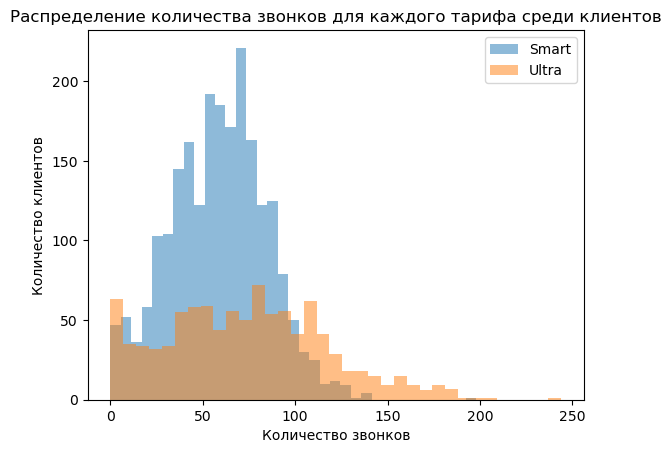

In [48]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества звонков для каждого тарифа среди клиентов')
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

Также, можно сказать, что для тарифа Smart большинство клиентов делают до 100 звонков в месяц, в то время как для тарифа Ultra большинство клиентов делают до 125 звонков в месяц.

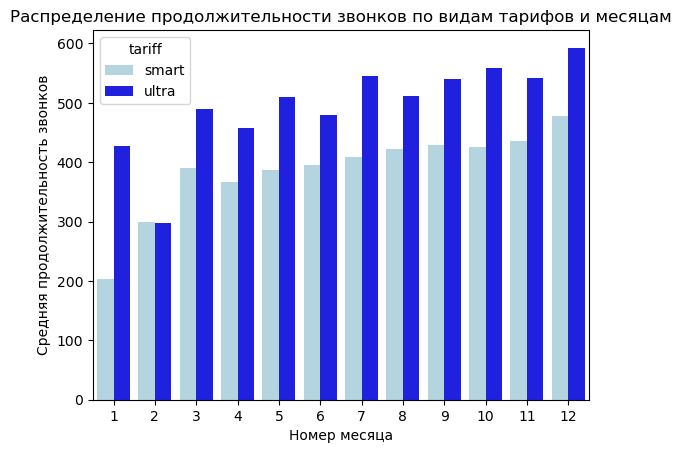

In [49]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

Средняя продолжительность звонков для тарифа Ultra выше, чем для тарифа Smart, за исключением февраля. Кроме того, в обоих тарифах продолжительность звонков имеет тенденцию к увеличению в течение года, достигая пика в декабре.

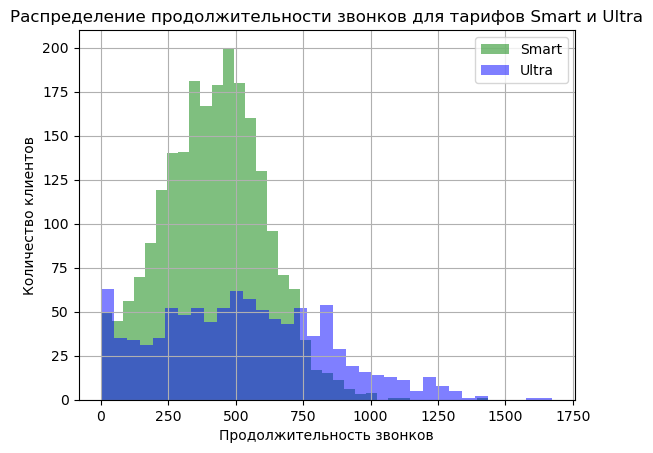

In [50]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');
plt.title('Распределение продолжительности звонков для тарифов Smart и Ultra')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество клиентов')
plt.show()

Можно заметить, что распределения продолжительности звонков для обоих тарифов имеют скошенность вправо, что означает, что большинство звонков имеют продолжительность менее 750. Однако, можно заметить, что распределение для тарифа Ultra смещено вправо относительно распределения для тарифа Smart, что означает, что пользователи тарифа Ultra имеют более длительные звонки, чем пользователи тарифа Smart.

**Промежуточный вывод:**

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

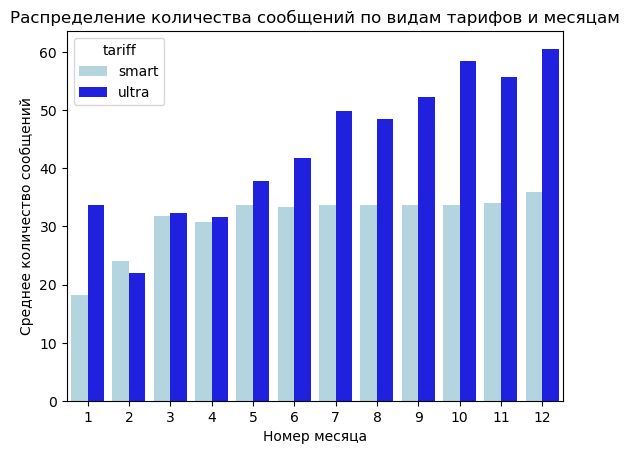

In [51]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

Среднее количество сообщений на тарифе ultra выше в любой месяц, кроме февраля.

Распределение количества сообщений на тарифе smart росло до марта и далее находилось на уровне 30-35 в течение года. У клиентов тарифа ultra кол-во сообщений растет с каждым месяцем, кроме февраля и апреля.

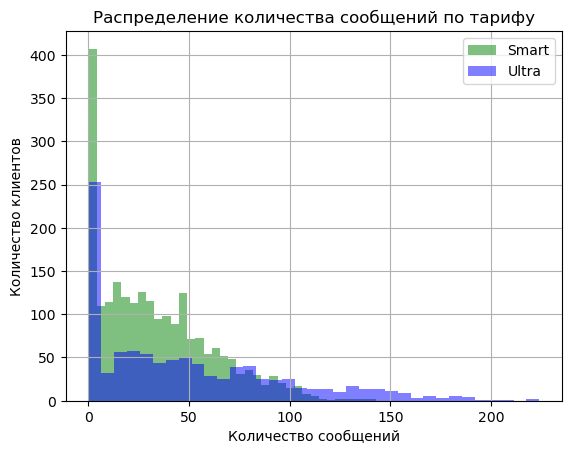

In [52]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');
plt.title('Распределение количества сообщений по тарифу')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов')
plt.show()

**Промежуточный вывод:**

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

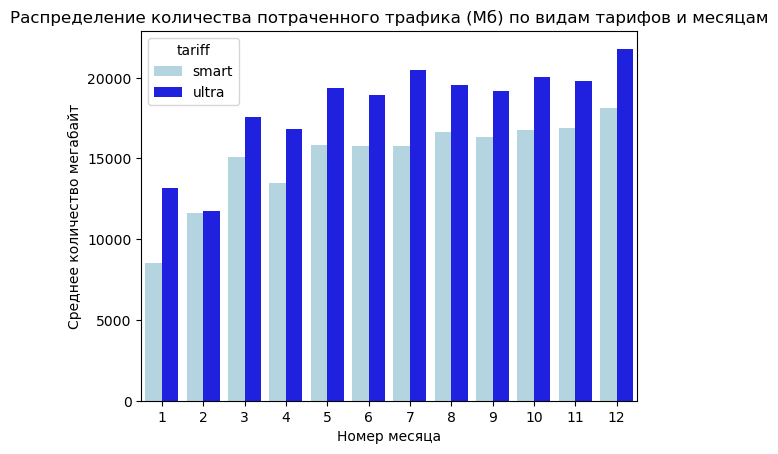

In [53]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

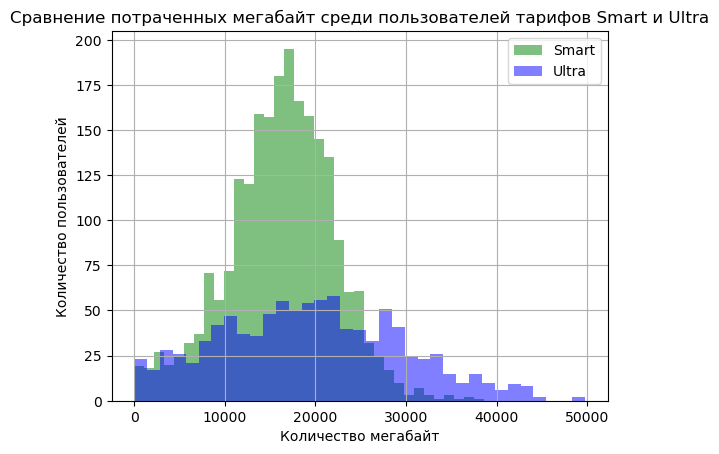

In [54]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');
plt.title('Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество пользователей')
plt.show()

**Промежуточный вывод:**

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

# Проверка гипотез

Проверка гипотезы 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [55]:
results = st.ttest_ind(
    user_behavior.loc[user_behavior.tariff == 'ultra', 'total_cost'],
    user_behavior.loc[user_behavior.tariff == 'smart', 'total_cost'], 
    equal_var=False)

# уровень значимости
alpha = 0.05
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.2606313931076085e-250
Отвергаем нулевую гипотезу


Результаты теста говорят о том, что p-value значительно меньше уровня значимости alpha, то есть p-value < alpha. Это означает, что существует значимая разница между средней выручкой пользователей тарифов "Ультра" и "Смарт", и мы отвергаем нулевую гипотезу. Таким образом, мы можем сделать вывод, что средняя выручка пользователей тарифов "Ультра" и "Смарт" действительно различается.

Проверка гипотезы 2: пользователи из Москвы приносят больше выручки, чем пользователи из других городов;

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [56]:
results = st.ttest_ind(
    user_behavior.loc[user_behavior['city'] == 'Москва']['total_cost'], 
    user_behavior.loc[user_behavior['city'] != 'Москва']['total_cost'], equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Р-value больше уровня значимости alpha, то есть p-value > alpha. Нет оснований для отвержения нулевой гипотезы о том, что средняя выручка пользователей из Москвы и пользователей из других городов одинакова. Следовательно, мы не можем сделать вывод о том, что пользователи из Москвы приносят больше выручки, чем пользователи из других городов.

# Подведение итогов

**В ходе знакомства с данными были выявлены следующие проблемы:**

1. В каждой из таблиц есть столбцы с несоответствующими типами данных;
2. Неинформативный столбец Unnamed: 0 в датафрейме sessions.

**На этапе предобработки данных** мы изменили типы данных с таблицах, удадлили неинформативный столбец и произвели дополнительные агрегированные расчёты с группировкой данных.

**В ходе анализа данных выяснили, что:**

1. Расторгли договор 7.6% клиентов из исследуемой выборки
2. Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.
3. В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.
4. Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

**Мы проверили 2 гипотезы:**
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
2. Пользователи из Москвы приносят больше выручки, чем пользователи из других городов

И пришли к следующему:

1. Существует значимая разница между средней выручкой пользователей тарифов "Ультра" и "Смарт". Cредняя выручка пользователей тарифов "Ультра" и "Смарт" действительно различается.
2. Cредняя выручка пользователей из Москвы и пользователей из других городов одинакова. То есть пользователи из Москвы маловероятно приносят больше выручки, чем пользователи из других городов.